___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (9,4)
pd.set_option('display.max_columns', 50)

In [65]:
df = pd.read_csv('/content/drive/MyDrive/NLP - Project/Womens Clothing E-Commerce Reviews.csv')

### Data Wrangling

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

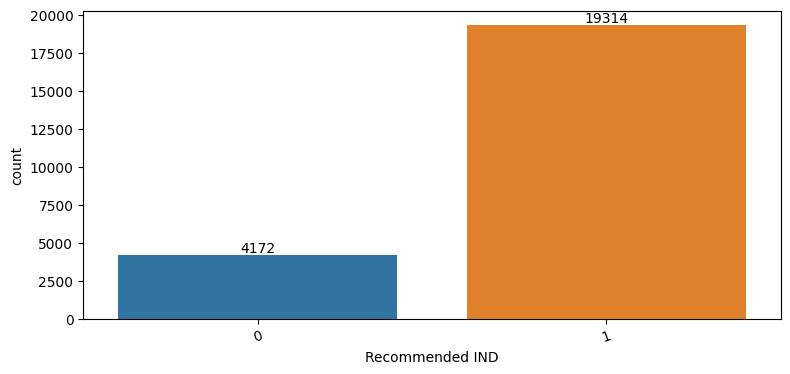

In [67]:
ax = sns.countplot(data = df, x ="Recommended IND")
for p in ax.containers:
    ax.bar_label(p)
plt.xticks(rotation =20);

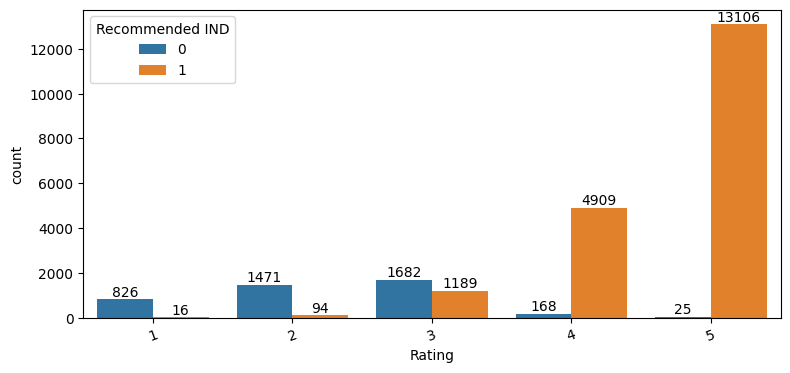

In [68]:
ax = sns.countplot(data = df, x ="Rating", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)
plt.xticks(rotation =20);

In [69]:
df.drop(index=df[(df.Rating == 1) & (df['Recommended IND'] == 1)].index, inplace=True)
df.drop(index=df[(df.Rating == 2) & (df['Recommended IND'] == 1)].index, inplace=True)
df.drop(index=df[(df.Rating == 4) & (df['Recommended IND'] == 0)].index, inplace=True)
df.drop(index=df[(df.Rating == 5) & (df['Recommended IND'] == 0)].index, inplace=True)

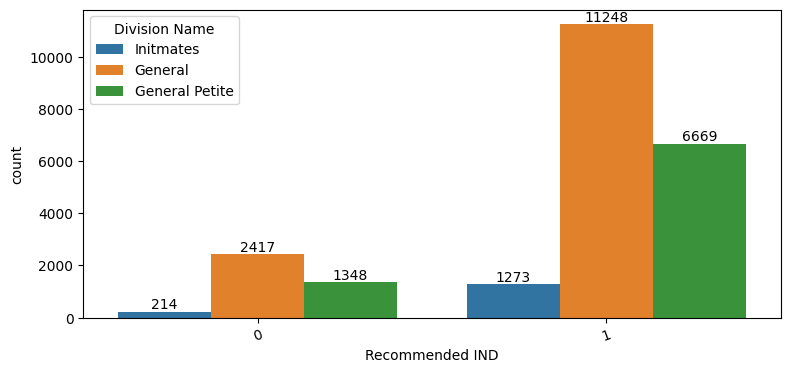

In [70]:
ax = sns.countplot(data = df, x ="Recommended IND", hue = "Division Name")
for p in ax.containers:
    ax.bar_label(p)
plt.xticks(rotation =20);

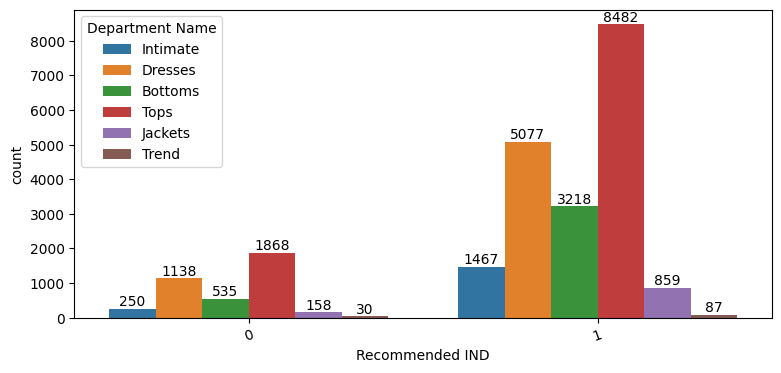

In [71]:
ax = sns.countplot(data = df, x ="Recommended IND", hue = "Department Name")
for p in ax.containers:
    ax.bar_label(p)
plt.xticks(rotation =20);

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [72]:
df.head(2)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses


In [73]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [74]:
df.drop(columns=['Unnamed: 0', 'Clothing ID', 'Positive Feedback Count', 'Class Name'], inplace=True)
df.rename(columns={'Age':'age', 'Title':'title', 'Review Text':'review', 'Rating':'rating', 'Recommended IND':'is_recommended', 'Division Name':'division', 'Department Name':'department'}, inplace=True)

In [75]:
df.head()

,age,title,review,rating,is_recommended,division,department
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,General,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,General,Tops


---
---


### Missing Value Detection

In [76]:
print('****Null Check****')
display(df.isnull().sum())
print('****Duplicate Check****')
display(df.duplicated().sum())

****Null Check****


age                  0
title             3761
review             838
rating               0
is_recommended       0
division            14
department          14
dtype: int64

****Duplicate Check****


397

In [77]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df.is_recommended = df.is_recommended.map({1:0, 0:1})

In [78]:
sent_df = df[['review', 'is_recommended']]
sent_df

,review,is_recommended
0,I had such high hopes for this dress and reall...,1
1,"I love, love, love this jumpsuit. it's fun, fl...",0
2,This shirt is very flattering to all due to th...,0
3,"I love tracy reese dresses, but this one is no...",1
4,I aded this in my basket at hte last mintue to...,0
...,...,...
19400,I was very happy to snag this dress at such a ...,0
19401,"It reminds me of maternity clothes. soft, stre...",0
19402,"This fit well, but the top was very see throug...",1
19403,I bought this dress for a wedding i have this ...,0


---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [79]:
import random 

In [80]:
sent_df.review[random.randint(0, 19658)]

'This is an absolutely gorgeous dress. i have the arcata patchwork dress which fits beautifully without looking too full, but this one is just too voluminous. also, the bottom of the front yoke hits at a weird spot on my bust. this would be a great maternity dress or it would be perfect for a thin woman who can carry off the large amount of fabric. so disappointed, the fabric is beautiful and the colors are too. this can be worn year round, with sandals or boots.'

In [85]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

stop_words = stopwords.words('english')
for i in ["not", "no"]:
        stop_words.remove(i)

def cleaning(data):
    data = data.replace("'", "")
    text_tokens = word_tokenize(data.lower())
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    return " ".join(text_cleaned)

In [86]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [87]:
cleaning_text = sent_df["review"].apply(cleaning)
cleaning_text.head()

0    high hope dress really wanted work initially o...
1    love love love jumpsuit fun flirty fabulous ev...
2    shirt flattering due adjustable front tie perf...
3    love tracy reese dress one not petite foot tal...
4    aded basket hte last mintue see would look lik...
Name: review, dtype: object

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [88]:
neg_reviews = sent_df[sent_df.is_recommended == 1].review
neg_reviews

0        I had such high hopes for this dress and reall...
3        I love tracy reese dresses, but this one is no...
8        Dress runs small esp where the zipper area run...
19       First of all, this is not pullover styling. th...
22       Loved the material, but i didnt really look at...
                               ...                        
19371    I really wanted to like this dress and was enc...
19373    I tried these on because the color is really p...
19381    I purchased this for a very good price and i t...
19398    I was surprised at the positive reviews for th...
19402    This fit well, but the top was very see throug...
Name: review, Length: 3408, dtype: object

In [89]:
pos_reviews = sent_df[sent_df.is_recommended == 0].review
pos_reviews

1        I love, love, love this jumpsuit. it's fun, fl...
2        This shirt is very flattering to all due to th...
4        I aded this in my basket at hte last mintue to...
5        I ordered this in carbon for store pick up, an...
6        I love this dress. i usually get an xs but it ...
                               ...                        
19399    So i wasn't sure about ordering this skirt bec...
19400    I was very happy to snag this dress at such a ...
19401    It reminds me of maternity clothes. soft, stre...
19403    I bought this dress for a wedding i have this ...
19404    This dress in a lovely platinum is feminine an...
Name: review, Length: 15997, dtype: object

### Collect Words (positive and negative separately)

In [90]:
neg_words = ' '.join(neg_reviews)
neg_words[:1000]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress. Dress run

In [91]:
pos_words = ' '.join(pos_reviews)
pos_words[:1000]

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments! This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!! I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops. I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [92]:
from wordcloud import WordCloud

worldcloud = WordCloud(background_color="white", max_words =250)

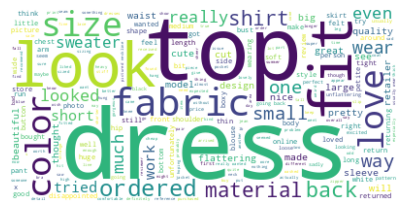

In [93]:
worldcloud.generate(neg_words)

plt.figure(figsize = (5,5))
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

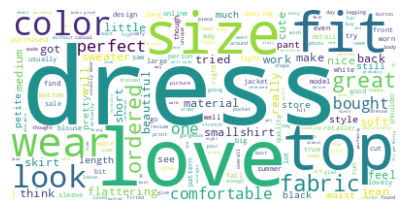

In [94]:
worldcloud.generate(pos_words)

plt.figure(figsize = (5,5))
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X = df["review"]
y = df["is_recommended"]

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=36)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [98]:
from sklearn.feature_extraction.text import CountVectorizer

In [99]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=2, max_df=0.9) 
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

### TF-IDF

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [101]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=2, max_df=0.9)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

### Eval Function

In [102]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer, average_precision_score
from scikitplot.metrics import plot_roc, plot_precision_recall

scoring = ['accuracy', 'precision', 'recall', 'f1']

In [103]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train)) 

## Logistic Regression

### CountVectorizer

In [104]:
from sklearn.linear_model import LogisticRegression

In [194]:
log = LogisticRegression(C = 3, max_iter=1000) #class_weight='balanced'
log.fit(X_train_count,y_train)

LogisticRegression(C=3, max_iter=1000)

In [106]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[3027  172]
 [ 276  406]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      3199
           1       0.70      0.60      0.64       682

    accuracy                           0.88      3881
   macro avg       0.81      0.77      0.79      3881
weighted avg       0.88      0.88      0.88      3881

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     12798
           1       0.94      0.89      0.91      2726

    accuracy                           0.97     15524
   macro avg       0.96      0.94      0.95     15524
weighted avg       0.97      0.97      0.97     15524



In [107]:
model = LogisticRegression(C = 3, max_iter=1000)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.883276
train_accuracy     0.973682
test_precision     0.687598
train_precision    0.948797
test_recall        0.615177
train_recall       0.898630
test_f1            0.649139
train_f1           0.923028
dtype: float64

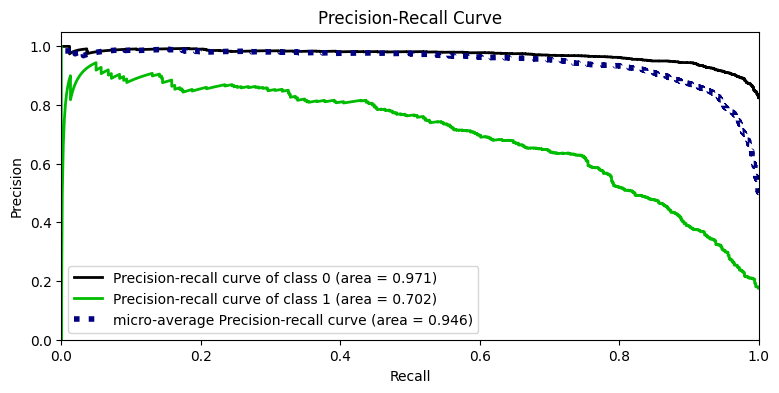

In [195]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LogisticRegression(C = 3, max_iter=1000)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [196]:
y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test, y_pred)
log_count_f1_neg = f1_score(y_test, y_pred)
log_AP_neg = average_precision_score(y_test, y_pred_proba[:, 1])

### TF-IDF

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
log = LogisticRegression(C=5)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=5)

In [112]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[3079  120]
 [ 276  406]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3199
           1       0.77      0.60      0.67       682

    accuracy                           0.90      3881
   macro avg       0.84      0.78      0.81      3881
weighted avg       0.89      0.90      0.89      3881

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     12798
           1       0.89      0.76      0.82      2726

    accuracy                           0.94     15524
   macro avg       0.92      0.87      0.89     15524
weighted avg       0.94      0.94      0.94     15524



In [113]:
model = LogisticRegression(C=5)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.894484
train_accuracy     0.943206
test_precision     0.756288
train_precision    0.897349
test_recall        0.589109
train_recall       0.763960
test_f1            0.661840
train_f1           0.825292
dtype: float64

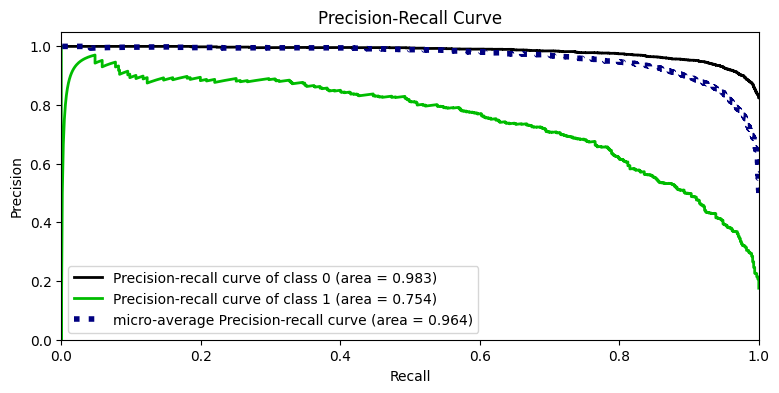

In [114]:
model = LogisticRegression(C=5)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [115]:
y_pred = log.predict(X_test_tf_idf)
log_tfidf_rec_neg = recall_score(y_test, y_pred)
log_tfidf_f1_neg = f1_score(y_test, y_pred)
log_tfidf_AP_neg = average_precision_score(y_test, y_pred_proba[:, 1])

## Naive Bayes 

### Countvectorizer

In [116]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [117]:
nb = MultinomialNB(alpha=0.5)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=0.5)

In [118]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[2935  264]
 [ 166  516]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3199
           1       0.66      0.76      0.71       682

    accuracy                           0.89      3881
   macro avg       0.80      0.84      0.82      3881
weighted avg       0.90      0.89      0.89      3881

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     12798
           1       0.71      0.85      0.78      2726

    accuracy                           0.91     15524
   macro avg       0.84      0.89      0.86     15524
weighted avg       0.92      0.91      0.92     15524



In [119]:
model = MultinomialNB(alpha=0.5)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.886755
train_accuracy     0.915357
test_precision     0.651447
train_precision    0.718390
test_recall        0.765573
train_recall       0.851960
test_f1            0.703632
train_f1           0.779493
dtype: float64

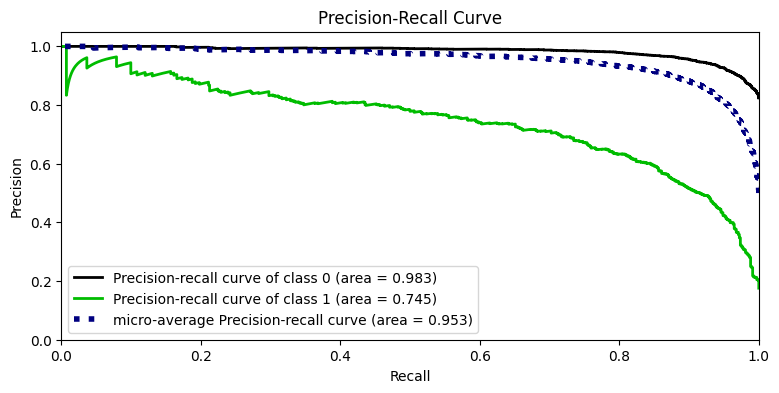

In [120]:
model = MultinomialNB(alpha=0.5)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [121]:
y_pred = nb.predict(X_test_count)
nb_count_rec_neg = recall_score(y_test, y_pred)
nb_count_f1_neg = f1_score(y_test, y_pred)
nb_AP_neg = average_precision_score(y_test, y_pred_proba[:, 1])

### TF-IDF

In [122]:
nb = MultinomialNB(alpha=0.05)
nb.fit(X_train_tf_idf,y_train)

MultinomialNB(alpha=0.05)

In [123]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[3157   42]
 [ 460  222]]
Test_Set
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      3199
           1       0.84      0.33      0.47       682

    accuracy                           0.87      3881
   macro avg       0.86      0.66      0.70      3881
weighted avg       0.87      0.87      0.85      3881

Train_Set
              precision    recall  f1-score   support

           0       0.90      0.99      0.95     12798
           1       0.94      0.49      0.65      2726

    accuracy                           0.90     15524
   macro avg       0.92      0.74      0.80     15524
weighted avg       0.91      0.90      0.89     15524



In [124]:
model = MultinomialNB(alpha=0.05)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.868139
train_accuracy     0.907090
test_precision     0.829142
train_precision    0.939527
test_recall        0.314372
train_recall       0.503301
test_f1            0.455534
train_f1           0.655445
dtype: float64

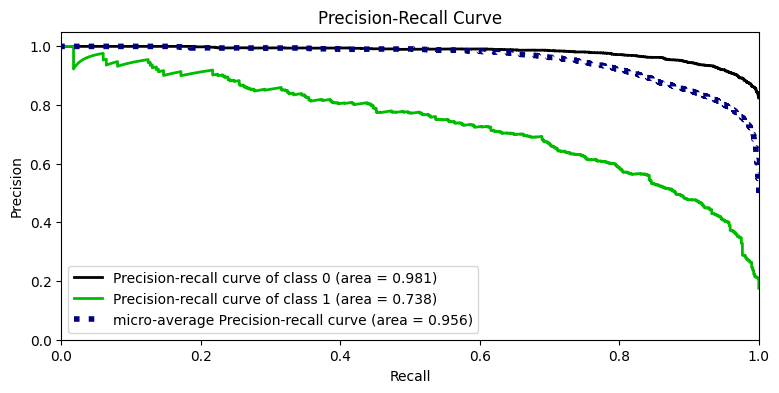

In [125]:
model = MultinomialNB(alpha=0.05)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [126]:
y_pred = nb.predict(X_test_tf_idf)
nb_tfidf_rec_neg = recall_score(y_test, y_pred)
nb_tfidf_f1_neg = f1_score(y_test, y_pred)
nb_tfidf_AP_neg = average_precision_score(y_test, y_pred_proba[:, 1])

## Support Vector Machine (SVM)

### Countvectorizer

In [127]:
from sklearn.svm import LinearSVC

In [128]:
svc = LinearSVC(C=0.1)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.1)

In [129]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[3048  151]
 [ 272  410]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3199
           1       0.73      0.60      0.66       682

    accuracy                           0.89      3881
   macro avg       0.82      0.78      0.80      3881
weighted avg       0.89      0.89      0.89      3881

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     12798
           1       0.92      0.83      0.87      2726

    accuracy                           0.96     15524
   macro avg       0.94      0.90      0.92     15524
weighted avg       0.96      0.96      0.96     15524



In [130]:
model = LinearSVC(C=0.1)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.887527
train_accuracy     0.958773
test_precision     0.709788
train_precision    0.921857
test_recall        0.608930
train_recall       0.836105
test_f1            0.655163
train_f1           0.876880
dtype: float64

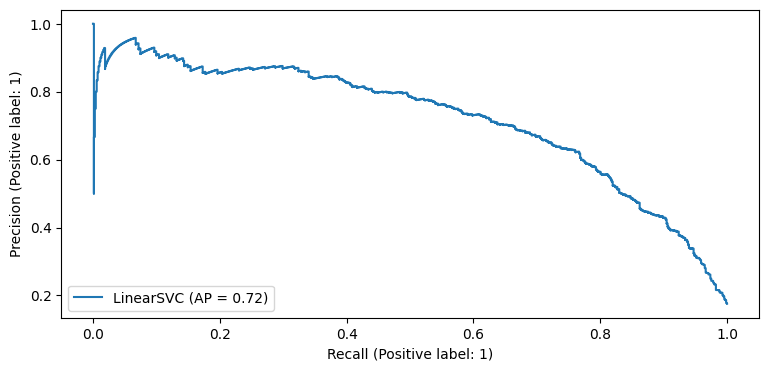

In [131]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    svc, X_test_count, y_test
)

In [132]:
decision_function = svc.decision_function(X_test_count)
y_pred = svc.predict(X_test_count)
svc_count_rec_neg = recall_score(y_test, y_pred)
svc_count_f1_neg = f1_score(y_test, y_pred)
svc_AP_neg = average_precision_score(y_test, decision_function)

### TD-IDF

In [133]:
svc = LinearSVC(C=0.8)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.8)

In [134]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[3064  135]
 [ 260  422]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3199
           1       0.76      0.62      0.68       682

    accuracy                           0.90      3881
   macro avg       0.84      0.79      0.81      3881
weighted avg       0.89      0.90      0.89      3881

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     12798
           1       0.91      0.81      0.86      2726

    accuracy                           0.95     15524
   macro avg       0.93      0.90      0.91     15524
weighted avg       0.95      0.95      0.95     15524



In [135]:
model = LinearSVC(C=0.8)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.892358
train_accuracy     0.954744
test_precision     0.737373
train_precision    0.914469
test_recall        0.601221
train_recall       0.818863
test_f1            0.662005
train_f1           0.864026
dtype: float64

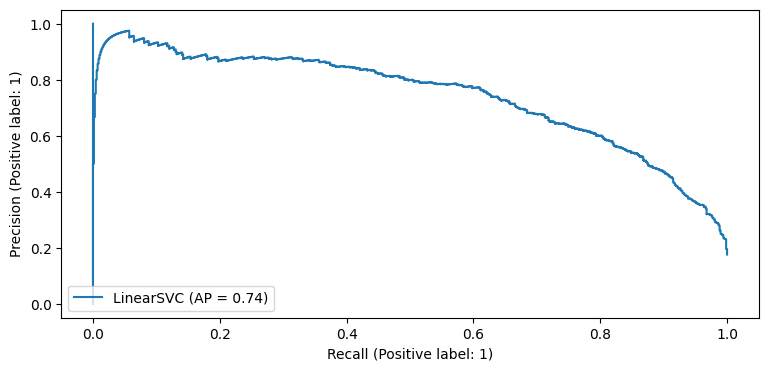

In [136]:
display = PrecisionRecallDisplay.from_estimator(
    svc, X_test_tf_idf, y_test
)

In [137]:
decision_function = svc.decision_function(X_test_count)
y_pred = svc.predict(X_test_count)
svc_tfidf_rec_neg = recall_score(y_test, y_pred)
svc_tfidf_f1_neg = f1_score(y_test, y_pred)
svc_tfidf_AP_neg = average_precision_score(y_test, decision_function)

## Random Forest

### Countvectorizer

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [155]:
rf = RandomForestClassifier(1500, max_depth = 2, max_features=5, n_jobs = -1, class_weight='balanced')
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=5,
                       n_estimators=1500, n_jobs=-1)

In [140]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[2774  425]
 [ 130  552]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3199
           1       0.56      0.81      0.67       682

    accuracy                           0.86      3881
   macro avg       0.76      0.84      0.79      3881
weighted avg       0.89      0.86      0.87      3881

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     12798
           1       0.60      0.86      0.70      2726

    accuracy                           0.87     15524
   macro avg       0.78      0.87      0.81     15524
weighted avg       0.90      0.87      0.88     15524



In [141]:
model = RandomForestClassifier(1500, max_depth = 2, max_features=5, n_jobs = -1, class_weight='balanced')
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.851909
train_accuracy     0.872663
test_precision     0.559406
train_precision    0.597033
test_recall        0.789403
train_recall       0.859545
test_f1            0.652598
train_f1           0.703778
dtype: float64

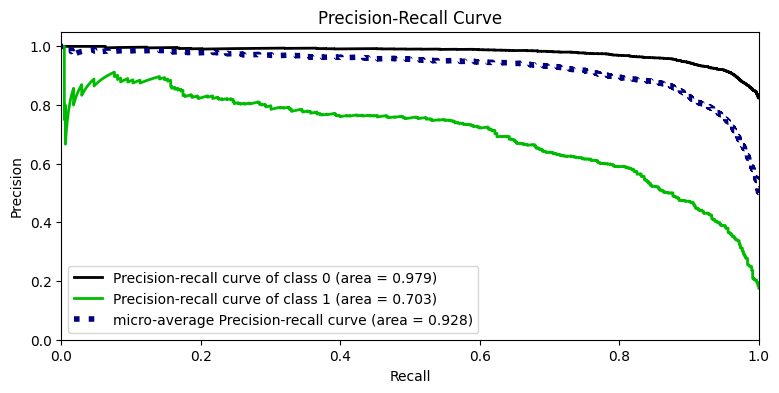

In [154]:
model = RandomForestClassifier(1500, max_depth = 2, max_features=5, n_jobs = -1, class_weight='balanced')

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [156]:
y_pred = rf.predict(X_test_count)
rf_count_rec_neg = recall_score(y_test, y_pred)
rf_count_f1_neg = f1_score(y_test, y_pred)
rf_AP_neg = average_precision_score(y_test, y_pred_proba[:, 1])

### TF-IDF

In [143]:
rf = RandomForestClassifier(1500, max_depth = 2, max_features=5, n_jobs = -1, class_weight='balanced')
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=5,
                       n_estimators=1500, n_jobs=-1)

In [144]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[2821  378]
 [ 172  510]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      3199
           1       0.57      0.75      0.65       682

    accuracy                           0.86      3881
   macro avg       0.76      0.81      0.78      3881
weighted avg       0.88      0.86      0.87      3881

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     12798
           1       0.64      0.84      0.73      2726

    accuracy                           0.89     15524
   macro avg       0.80      0.87      0.83     15524
weighted avg       0.91      0.89      0.89     15524



In [145]:
model = RandomForestClassifier(1500, max_depth = 2, max_features=5, n_jobs = -1, class_weight='balanced')
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.848040
train_accuracy     0.880909
test_precision     0.549475
train_precision    0.612823
test_recall        0.770000
train_recall       0.878780
test_f1            0.640673
train_f1           0.721806
dtype: float64

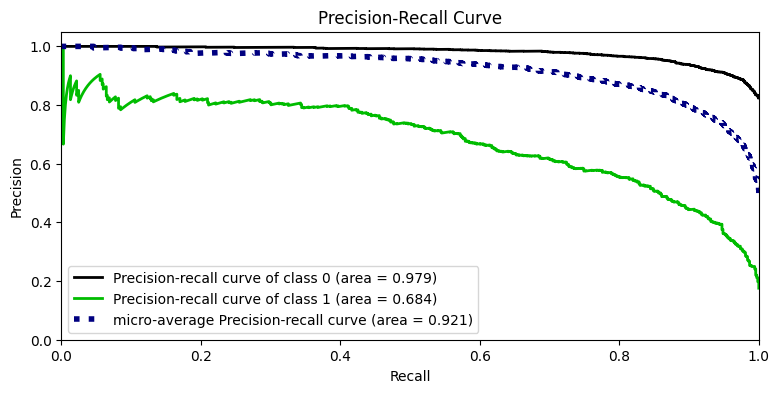

In [146]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = RandomForestClassifier(1500, max_depth = 2, max_features=5, n_jobs = -1, class_weight='balanced')

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [147]:
y_pred = rf.predict(X_test_tf_idf)
rf_tfidf_rec_neg = recall_score(y_test, y_pred)
rf_tfidf_f1_neg = f1_score(y_test, y_pred)
rf_tfidf_AP_neg = average_precision_score(y_test, y_pred_proba[:, 1])

## Ada Boosting

### Countvectorizer

In [148]:
from sklearn.ensemble import AdaBoostClassifier

In [229]:
ada = AdaBoostClassifier(n_estimators= 500)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500)

In [230]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[3036  163]
 [ 296  386]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3199
           1       0.70      0.57      0.63       682

    accuracy                           0.88      3881
   macro avg       0.81      0.76      0.78      3881
weighted avg       0.87      0.88      0.88      3881

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     12798
           1       0.82      0.69      0.75      2726

    accuracy                           0.92     15524
   macro avg       0.88      0.83      0.85     15524
weighted avg       0.92      0.92      0.92     15524



In [232]:
model = AdaBoostClassifier(n_estimators= 500)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy      0.880829
train_accuracy     0.923087
test_precision     0.696711
train_precision    0.834504
test_recall        0.568977
train_recall       0.701027
test_f1            0.625722
train_f1           0.761961
dtype: float64

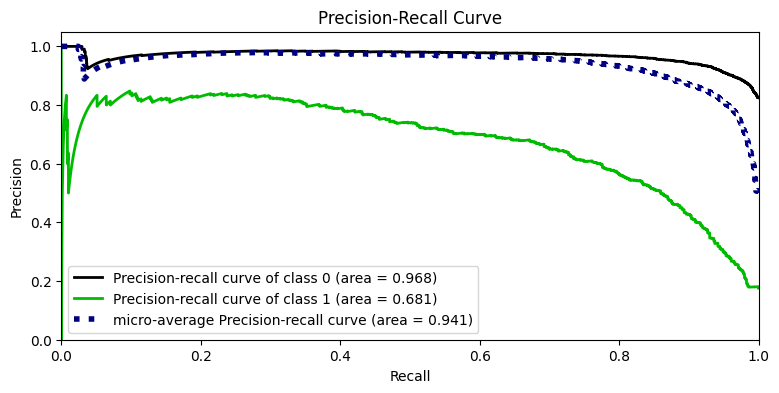

In [233]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = AdaBoostClassifier(n_estimators= 500)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [234]:
y_pred = ada.predict(X_test_count)
ada_count_rec_neg = recall_score(y_test, y_pred)
ada_count_f1_neg = f1_score(y_test, y_pred)
ada_AP_neg = average_precision_score(y_test, y_pred_proba[:, 0])

### TF-IDF

In [157]:
ada = AdaBoostClassifier(n_estimators= 500, learning_rate= 1)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=500)

In [158]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[3016  183]
 [ 281  401]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3199
           1       0.69      0.59      0.63       682

    accuracy                           0.88      3881
   macro avg       0.80      0.77      0.78      3881
weighted avg       0.87      0.88      0.88      3881

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     12798
           1       0.85      0.75      0.79      2726

    accuracy                           0.93     15524
   macro avg       0.90      0.86      0.88     15524
weighted avg       0.93      0.93      0.93     15524



In [159]:
model = AdaBoostClassifier(n_estimators= 500, learning_rate= 1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy      0.877286
train_accuracy     0.940157
test_precision     0.681364
train_precision    0.872661
test_recall        0.565663
train_recall       0.771827
test_f1            0.618107
train_f1           0.819136
dtype: float64

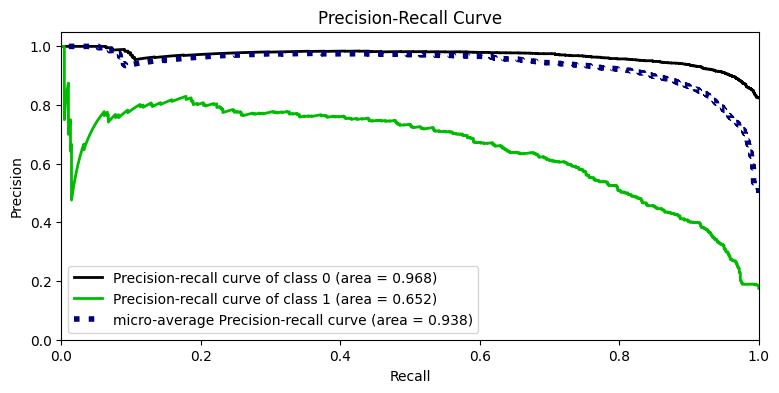

In [160]:
model = AdaBoostClassifier(n_estimators= 500, learning_rate= 1)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [161]:
y_pred = ada.predict(X_test_tf_idf)
ada_tfidf_rec_neg = recall_score(y_test, y_pred)
ada_tfidf_f1_neg = f1_score(y_test, y_pred)
ada_tfidf_AP_neg = average_precision_score(y_test, y_pred_proba[:, 0])

## DL modeling

In [164]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Tokenization

In [165]:
X = df['review']
y = df['is_recommended']

In [166]:
num_words = 10001 
tokenizer = Tokenizer(num_words=num_words)

In [167]:
tokenizer.fit_on_texts(X)

### Creating word index

In [168]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'size': 21,
 'love': 22,
 'have': 23,
 'very': 24,
 'fit': 25,
 'top': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'too': 34,
 'great': 35,
 'or': 36,
 "i'm": 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'at': 43,
 'up': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'perfect': 53,
 'little': 54,
 'one': 55,
 'these': 56,
 'will': 57,
 'flattering': 58,
 'an': 59,
 'well': 60,
 'out': 61,
 'soft': 62,
 '\r': 63,
 'back': 64,
 'can': 65,
 'because': 66,
 'had': 67,
 'comfortable': 68,
 'nice': 69,
 'bought': 70,
 'all': 71,
 'than': 72,
 'when': 73,
 'cute': 74,
 'bit': 75,
 'looks': 76,
 'fits': 77,
 'which': 78,
 'large': 79,
 'd

In [169]:
len(tokenizer.word_index)

14162

### Converting tokens to numeric

In [170]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [171]:
len(X_num_tokens[0])

97

### Maximum number of tokens for all documents¶

In [172]:
num_tokens = [len(sen_tokens) for sen_tokens in X_num_tokens]
num_tokens = np.array(num_tokens)
print(num_tokens.max())
print(num_tokens.mean())

115
62.28703942282917


In [173]:
max_tokens = 103
sum(num_tokens <= max_tokens) / len(num_tokens)

0.9678948724555527

### Fixing token counts of all documents (pad_sequences)

In [174]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens, padding="pre")

In [175]:
X_pad.shape

(19405, 103)

In [176]:
X_pad[50]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       169,   7,  26,   3,  15,  51, 286,   8, 217,   5,  11, 157],
      dtype=int32)

In [177]:
np.array(X_num_tokens[50])

array([169,   7,  26,   3,  15,  51, 286,   8, 217,   5,  11, 157])

### Train Set Split

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=42)

### Modeling

In [261]:
dl_model = Sequential()
embedding_size = 100

In [262]:
dl_model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))
dl_model.add(Dropout(0.2))

dl_model.add(GRU(units=50, return_sequences=True))

dl_model.add(Dropout(0.2)) 

dl_model.add(GRU(units=25, return_sequences=True))
dl_model.add(Dropout(0.2))

dl_model.add(GRU(units=12, return_sequences=False))

dl_model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)

dl_model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [263]:
dl_model.summary() 

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 103, 100)          1000100   
                                                                 
 dropout_172 (Dropout)       (None, 103, 100)          0         
                                                                 
 gru_21 (GRU)                (None, 103, 50)           22800     
                                                                 
 dropout_173 (Dropout)       (None, 103, 50)           0         
                                                                 
 gru_22 (GRU)                (None, 103, 25)           5775      
                                                                 
 dropout_174 (Dropout)       (None, 103, 25)           0         
                                                                 
 gru_23 (GRU)                (None, 12)               

In [264]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", 
                           patience = 1, restore_best_weights=True)

In [265]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()
weights = {0:0.6, 1:2.8}

In [266]:
dl_model.fit(X_train, y_train, epochs=10, batch_size=256, class_weight=weights,  
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
69/69 [==============================] - 22s 205ms/step - loss: 0.5510 - recall: 0.6834 - val_loss: 0.3494 - val_recall: 0.8563
Epoch 2/10
69/69 [==============================] - 12s 180ms/step - loss: 0.2990 - recall: 0.9006 - val_loss: 0.3220 - val_recall: 0.9150
Epoch 3/10
69/69 [==============================] - 12s 179ms/step - loss: 0.2332 - recall: 0.9345 - val_loss: 0.3020 - val_recall: 0.8944


### Model Evaluation

In [267]:
dl_model_loss = pd.DataFrame(model.history.history)
dl_model_loss.head()

,loss,recall,val_loss,val_recall
0,0.538288,0.724813,0.405911,0.926686
1,0.297343,0.901206,0.387610,0.964809
2,0.228485,0.942289,0.269814,0.838710


<Axes: >

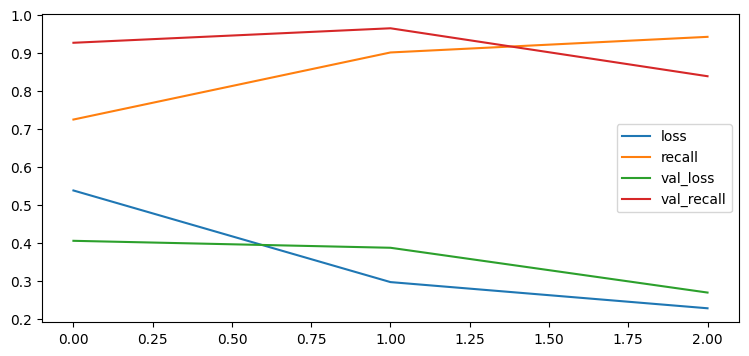

In [268]:
dl_model_loss.plot()

In [269]:
y_pred = dl_model.predict(X_test) >= 0.5
deep_rec_neg = recall_score(y_test, y_pred)
deep_f1_neg = f1_score(y_test, y_pred)
deep_AP_neg = average_precision_score(y_test, y_pred)

61/61 [==============================] - 4s 23ms/step


## BERT Modeling

In [10]:
import tensorflow as tf
import os

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

strategy = tf.distribute.TPUStrategy(resolver)

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Read Data

In [11]:
df = pd.read_csv('/content/drive/MyDrive/NLP - Project/ready_data.csv')

### Train test split

In [16]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 32.0 MB/s eta 0:00:00


In [12]:
X = df['review'].values
y = df['is_recommended'].values

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

### Tokenization

In [17]:
from transformers import AutoTokenizer

In [18]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

### Fixing token counts of all documents

In [19]:
number_tokens_sentences = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    number_tokens_sentences.append(len(input_ids))

print('Max sentence length: ', max(number_tokens_sentences))

Max sentence length:  162


In [20]:
sum(np.array(number_tokens_sentences) <= 136) / len(number_tokens_sentences)

0.9888173151249678

### Transformation Vectors to Matrices

In [21]:
def transformation(X):
    seq_len = 136
    Xids = []
    Xmask = []
    for sentence in X: 
        tokens = tokenizer.encode_plus(sentence, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 
        Xids.append(tokens['input_ids']) 
        Xmask.append(tokens['attention_mask']) 
    return np.array(Xids), np.array(Xmask)

In [22]:
Xids_train, Xmask_train = transformation(X_train)
Xids_test, Xmask_test = transformation(X_test)

In [23]:
labels_train = y_train.reshape(-1,1)
labels_test = y_test.reshape(-1,1)

### Transformation Matrix to Tensorflow tensor

In [24]:
import tensorflow as tf

In [47]:
dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))

In [26]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [48]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func) 

### Batch Size

In [49]:
batch_size = 32

train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

### Creating optimization

In [29]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 8.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 62.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are instal

In [50]:
from official.nlp import optimization
epochs = 3

steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)
init_lr = 2e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')  

In [51]:
def create_model():
    from transformers import TFAutoModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("dbmdz/bert-base-cased-finetuned-conll03-english") 

    input_ids = Input(shape=(136,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(136,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"]

    x = Dense(136, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x)
    y = Dense(1, activation='sigmoid', name='outputs')(x) 

    return Model(inputs=[input_ids, attention_mask], outputs=y)

### Creating Model with TPU

In [52]:
with strategy.scope():
    
    from tensorflow.keras.losses import BinaryCrossentropy
    from tensorflow.keras.metrics import Recall

    loss = BinaryCrossentropy()
    recall = Recall()
    model3 = create_model()
    model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some layers from the model checkpoint at dbmdz/bert-base-cased-finetuned-conll03-english were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at dbmdz/bert-base-cased-finetuned-conll03-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [53]:
model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 136)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 136)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 136,                                         

### Model Fiting

In [54]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs)

Epoch 1/3
546/546 [==============================] - 182s 194ms/step - loss: 0.6821 - recall_3: 0.6143 - val_loss: 0.3475 - val_recall_3: 0.5044
Epoch 2/3
546/546 [==============================] - 50s 92ms/step - loss: 0.5646 - recall_3: 0.7297 - val_loss: 0.5646 - val_recall_3: 0.8475
Epoch 3/3
546/546 [==============================] - 51s 94ms/step - loss: 0.5089 - recall_3: 0.7868 - val_loss: 0.5036 - val_recall_3: 0.8152


### Model evaluation

In [55]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

,loss,recall_3,val_loss,val_recall_3
0,0.682101,0.614281,0.347536,0.504399
1,0.564628,0.729703,0.564582,0.847507
2,0.508918,0.786762,0.503605,0.815249


<Axes: >

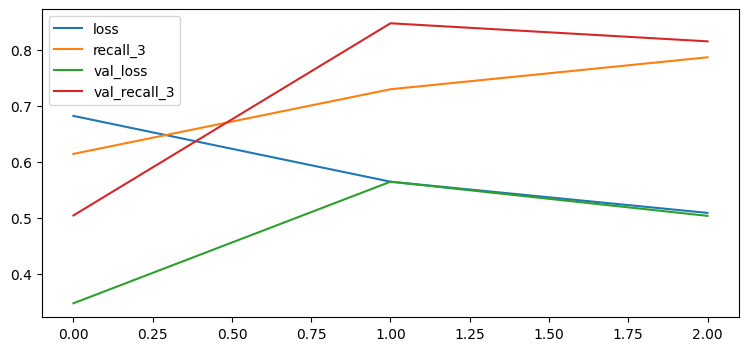

In [56]:
model_loss.plot()

In [63]:
y_pred = model3.predict(val_ds) >= 0.5
bert_rec_neg = recall_score(y_test, y_pred)
bert_f1_neg = f1_score(y_test, y_pred)
bert_AP_neg = average_precision_score(y_test, y_pred[:, 0])

61/61 [==============================] - 7s 31ms/step


### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [270]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "Bert", "Deep_Learning"],
                        
                        "F1_Score_Negative": [nb_count_f1_neg, log_count_f1_neg, svc_count_f1_neg,
                                             rf_count_f1_neg, ada_count_f1_neg, nb_tfidf_f1_neg, log_tfidf_f1_neg,
                                             svc_tfidf_f1_neg, rf_tfidf_f1_neg, ada_tfidf_f1_neg, bert_f1_neg, deep_f1_neg],
                        
                        "Recall_Score_Negative": [nb_count_rec_neg, log_count_rec_neg, svc_count_rec_neg, 
                                                 rf_count_rec_neg, ada_count_rec_neg, 
                                                  nb_tfidf_rec_neg, log_tfidf_rec_neg, svc_tfidf_rec_neg, 
                                                 rf_tfidf_rec_neg, ada_tfidf_rec_neg, bert_rec_neg, deep_rec_neg],
                        
                        "Average_Precision_Score_Negative": [nb_AP_neg, log_AP_neg, svc_AP_neg, rf_AP_neg,
                                                          ada_AP_neg, nb_tfidf_AP_neg, log_tfidf_AP_neg, svc_tfidf_AP_neg,
                                                            rf_tfidf_AP_neg, ada_tfidf_AP_neg, bert_AP_neg, deep_AP_neg]})

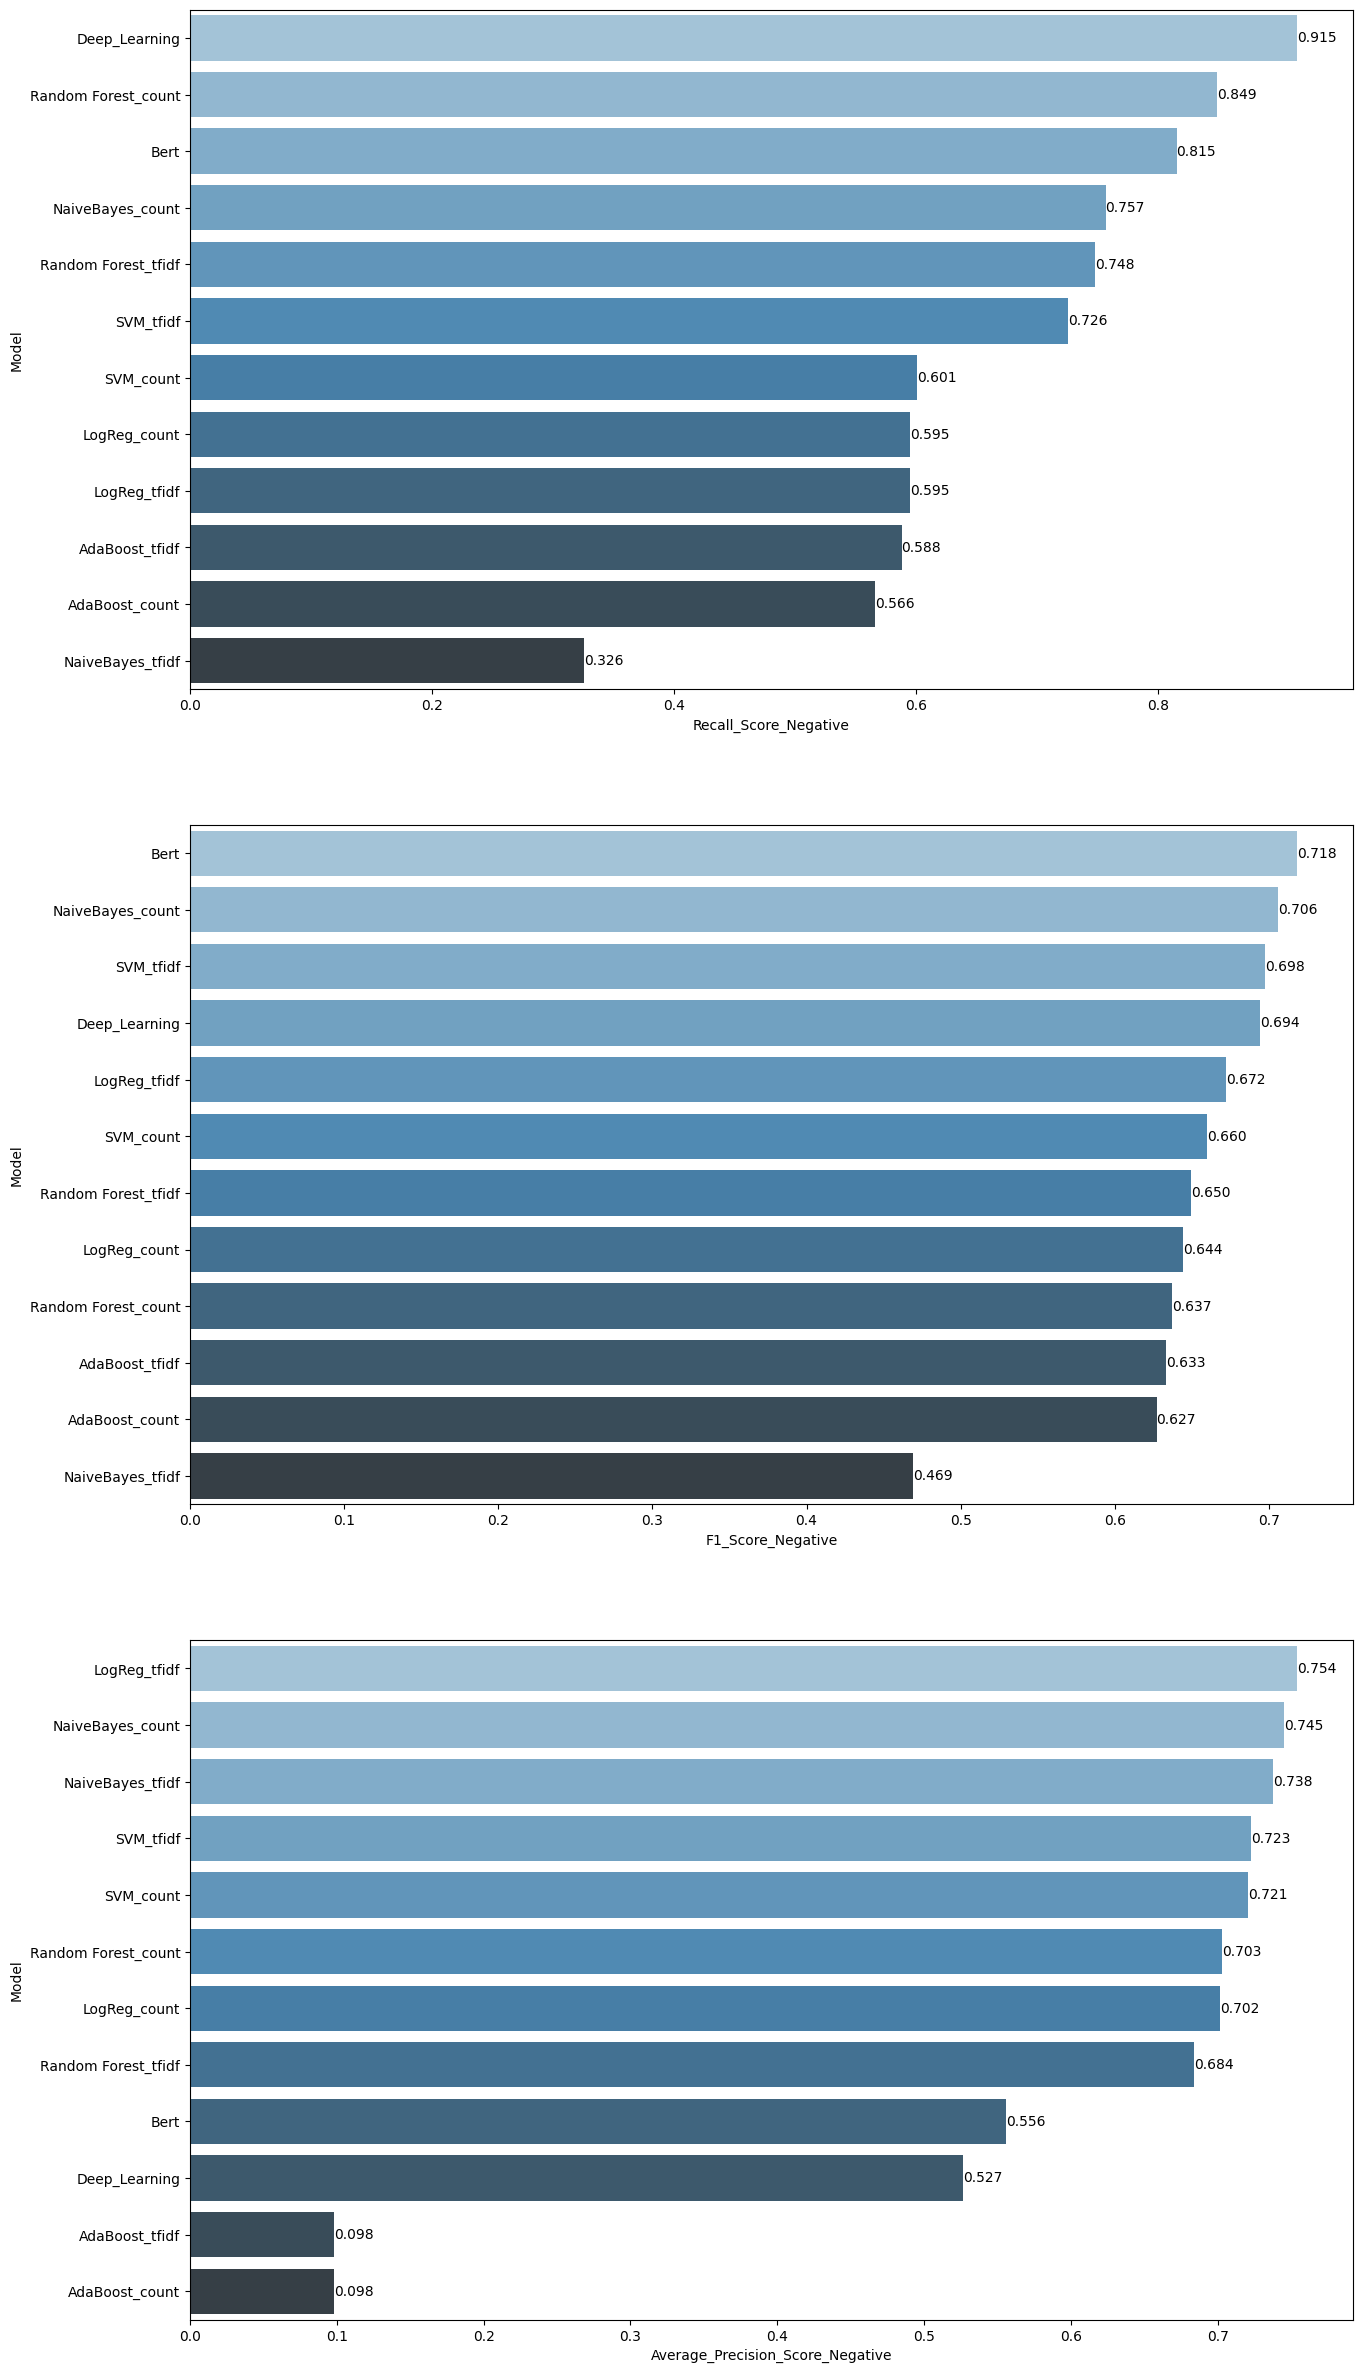

In [271]:
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")            
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score_Negative", ascending=False)
ax=sns.barplot(x="F1_Score_Negative", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score_Negative", ascending=False)
ax=sns.barplot(x="Average_Precision_Score_Negative", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

### Conclusion

Since our company aims to produce solutions against bad comments, we decide to continue with the model with the highest recall score.

In [273]:
dl_model.save('review_company.h5')

In [275]:
from tensorflow.keras.models import load_model
model_review = load_model('/content/review_company.h5')

In [371]:
review1 = "worst order I've ever placed in my life I don't think I will buy it again"
review2 = "I have been scammed, I have bought a dress and it has not reached Me, it also appears in the application as received and at no time did I give it to said button received. Watch out for these fake sellers. It's a TAFA! And after you make the claim they make you dizzy to tell you that there is NO refund and thus steal you in your face. I have run out of my money and my order."
review3 = "The product is very comfortable, I was a little worried about the comments for the size, but it was perfect"
review4 = "I didn't expect this dress to look as good as it does on me...beautiful dress just like in the picture...I love it!!!"
review5 = "the product is very bad, the body sizes are incompatible and the designs are terrible"

reviews = [review1, review2, review3, review4, review5]

In [372]:
tokens = tokenizer.texts_to_sequences(reviews)

In [373]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens, padding="pre")
tokens_pad.shape

(5, 103)

In [374]:
prob = [i[0] for i in model.predict(tokens_pad)]

1/1 [==============================] - 0s 56ms/step


In [375]:
pred = [i[0] for i in (model.predict(tokens_pad) >0.5).astype("int")]

1/1 [==============================] - 0s 45ms/step


In [376]:
pd.set_option('display.max_colwidth', None) 
my_dict = {"Review":reviews, "prob":prob, "classes":pred}
pd.DataFrame(my_dict)

,Review,prob,classes
0,worst order I've ever placed in my life I don't think I will buy it again,0.255433,0
1,"I have been scammed, I have bought a dress and it has not reached Me, it also appears in the application as received and at no time did I give it to said button received. Watch out for these fake sellers. It's a TAFA! And after you make the claim they make you dizzy to tell you that there is NO refund and thus steal you in your face. I have run out of my money and my order.",0.850111,1
2,"The product is very comfortable, I was a little worried about the comments for the size, but it was perfect",0.123391,0
3,I didn't expect this dress to look as good as it does on me...beautiful dress just like in the picture...I love it!!!,0.541229,1
4,"the product is very bad, the body sizes are incompatible and the designs are terrible",0.960736,1


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___